### 도서 추천
- 도서 요약, 작가, 장르 --> Feature변환 --> 코사인 유사도

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### 1. 데이터 탐색

In [2]:
df = pd.read_csv('data/books.csv')
df.head()

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [3]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)  # col에서 복붙해야 오류안남
df.tail()

,Desc,author,genre,image_link,rating,title
2377,"Ralph Roberts, a sus setenta años y tras la mu...",Stephen King,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.82,Insomnia
2378,Murder at the Vicarage marks the debut of Agat...,Agatha Christie,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Murder at the Vicarage
2379,In 1951 John Wyndham published his novel The D...,John Wyndham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.02,The Day of the Triffids
2380,This now classic book revealed Flannery O'Conn...,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.22,A Good Man is Hard to Find and Other Stories
2381,Imbued on every page with Frank McCourt's asto...,Frank McCourt,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.11,Angela's Ashes


In [4]:
df.shape     # 2382건

(2382, 6)

In [5]:
df.Desc[0]

"We know that power is shifting: From West to East and North to South, from presidential palaces to public squares, from once formidable corporate behemoths to nimble startups and, slowly but surely, from men to women. But power is not merely shifting and dispersing. It is also decaying. Those in power today are more constrained in what they can do with it and more at risk of losing it than ever before. In The End of Power, award-winning columnist and former Foreign Policy editor Moisés Naím illuminates the struggle between once-dominant megaplayers and the new micropowers challenging them in every field of human endeavor. Drawing on provocative, original research, Naím shows how the antiestablishment drive of micropowers can topple tyrants, dislodge monopolies, and open remarkable new opportunities, but it can also lead to chaos and paralysis. Naím deftly covers the seismic changes underway in business, religion, education, within families, and in all matters of war and peace. Example

#### 2. 데이터 전처리

In [6]:
# 결측치 확인
df.isna().sum().sum()

0

In [9]:
# 중복데이터 확인
df.shape[0], df.title.nunique(), df.Desc.nunique()   # 2382 -> 2378건 -> 2361건

(2382, 2378, 2361)

In [10]:
# 중복 데이터 제거 (혹시나 싶어 확인해본 Desc에도 중복이 있음-> 그냥 다 제거하기)
df.drop_duplicates(subset=['title'], inplace=True)
df.drop_duplicates(subset=['Desc'], inplace=True)
df.shape

(2359, 6)

In [11]:
# 인덱스 정리
df.set_index('title', inplace=True)
df.reset_index(inplace=True)
df.tail(3)  # 0~2358번까지 총 2359권

,title,Desc,author,genre,image_link,rating
2356,The Day of the Triffids,In 1951 John Wyndham published his novel The D...,John Wyndham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.02
2357,A Good Man is Hard to Find and Other Stories,This now classic book revealed Flannery O'Conn...,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.22
2358,Angela's Ashes,Imbued on every page with Frank McCourt's asto...,Frank McCourt,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.11


#### 3. Feature 변환

In [12]:
# 저자와 장르 필드의 공백 제거
df.author = df.author.str.replace(' ', '')  # 공동저자가 있을 수도 있으나 일단 이렇게
df.genre = df.genre.str.replace(' ', '')

In [13]:
# 저자와 장르 필드는 강조
df['total'] = df.Desc + (' '+df.author) * 3 + (' '+ df.genre) * 2

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english')
total_cv = cvect.fit_transform(df.total)
total_cv.shape

(2359, 29146)

In [15]:
# 검색을 쉽게하기- 책 제목과 인덱스를 가진 테이블 만들기
indices = pd.Series(df.index, index=df.title)   # 인덱스를 타이틀로

#### 4. 코사인 유사도

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity = cosine_similarity(total_cv)

In [20]:
def get_recommendation(title, cos_sim):
    index = indices[title]
    sim_scores = pd.Series(cos_sim[index])
    book_indices = sim_scores.sort_values(ascending=False).head(11).tail(10).index
    return df.title.iloc[book_indices]

In [21]:
get_recommendation('The Day of the Triffids', cos_similarity)   # 출력되는지 확인(2356번 책)

1489              A Separate Peace
1311                     The Stand
1328                    Neverwhere
1843                   Post Office
2326           The Lathe of Heaven
2106                   Left Behind
2207               The Time Keeper
1791                 The Overstory
1464    The Man in the High Castle
1198               Brave New World
Name: title, dtype: object

#### 5. 추천도서 이미지 출력

In [25]:
from PIL import Image               # 이미지 불러오는
import matplotlib.pyplot as plt   # 이미지 보여주려면 당연히 필요
import requests                    # 크롤링
from io import BytesIO  # 이미지는 바이너리 코드(헥사코드)-> url로 가져온 내용을 바이너리스트림 형태로 만드는 라이브러리

In [26]:
results = get_recommendation('The Da Vinci Code', cos_similarity)
results

1276                 The Lost Symbol
1567                          Origin
1206                 Angels & Demons
1331                         Inferno
1375                Digital Fortress
2106                     Left Behind
2013    The Invention of Hugo Cabret
1376          Breakfast of Champions
2041               Second Foundation
1383                 Deception Point
Name: title, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

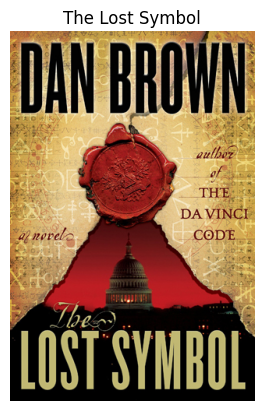

In [27]:
index = 1276    # The Lost Symbol
response = requests.get(df.image_link[index])   # 해당 이미지링크 가져옴
img = Image.open(BytesIO(response.content))
plt.imshow(img), plt.axis('off')
plt.title(df.title[index])
plt.show

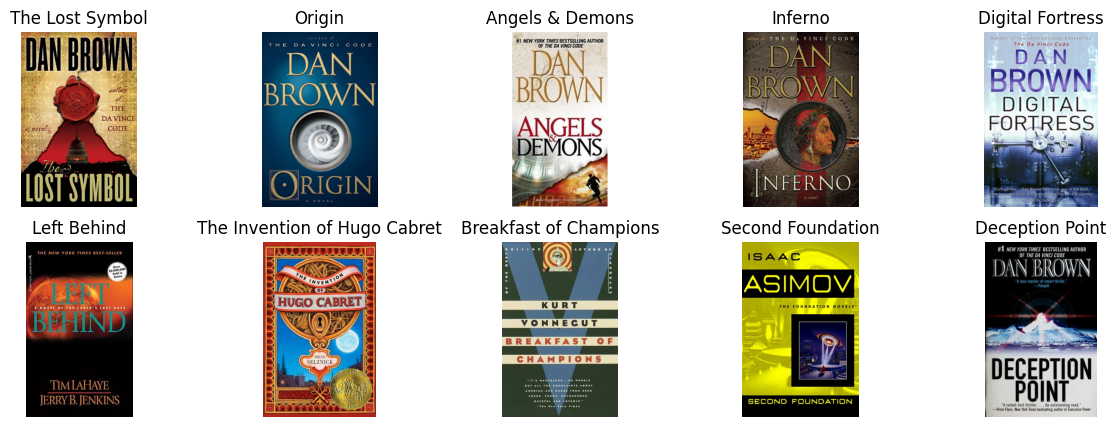

In [28]:
plt.figure(figsize=(15,5))
for i, index in enumerate(results.index):
    response = requests.get(df.image_link[index])
    img = Image.open(BytesIO(response.content))   # ByteIO 사용
    plt.subplot(2, 5, i+1)                       # subplot 추가        
    plt.imshow(img), plt.axis('off')
    plt.title(df.title[index])
plt.show()